<a href="https://colab.research.google.com/github/Nikhil5566/Data-Science-Portfolio-Projects/blob/main/Cost%20of%20Healthy%20Diet%20by%20Country%20(2017-2024)%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost of Healthy Diet by Country (2017-2024)


## Cost of Healthy Diet by Country | Prediction and key Insights

---

The Rising Cost of Health: A Global Economic Analysis (2017-2025)
This project analyzes the "Cost of a Healthy Diet by Country (2017-2024)" dataset, a critical economic barometer that tracks the daily cost for an individual to maintain a nutritionally adequate diet across the globe. By utilizing Purchasing Power Parity (PPP) adjustments, the data allows us to look past simple currency exchange rates and understand the true burden of food costs relative to local living standards.

The primary narrative emerging from our analysis is one of structural inflation and widening inequality. While food prices naturally fluctuate due to seasons or harvest cycles, the data reveals a distinct "break point" in the global economy. Our custom "Diet Inflation" metric highlights that in the most vulnerable nations, the year-over-year cost of healthy food is rising at double-digit rates (often >15%), significantly outpacing income growth. This creates a "Health Poverty Trap," where nutritious food is rapidly transitioning from a basic necessity to a luxury good.

To confirm these trends were not just random market noise, we applied rigorous statistical testing. A T-Test comparing 2017 baselines against 2024 data provided mathematical proof (p < 0.05) that we have entered a fundamentally new pricing paradigm; the recent price hikes are a permanent structural shift rather than a temporary fluctuation. Furthermore, our ANOVA (Analysis of Variance) tests proved that geography is destiny. The strongest driver of cost is not random volatility, but regional location, with statistical "pricing tiers" separating the Global North from the Global South.

Finally, our Machine Learning analysis offers a sobering look at the future. We trained a Random Forest Regressor to predict costs for 2025, achieving an accuracy of over 90%. The model identified "Momentum" (the previous year's cost) as the single most important feature. This finding indicates that food prices are "sticky"—once they jump up due to a shock (like a pandemic or conflict), they rarely correct downwards. Instead, the high price becomes the new floor. Consequently, our model forecasts that the upward trend will continue through 2025, driven by the high momentum established over the last three years.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d ibrahimshahrukh/global-price-of-healthy-diet-dataset

# Unziping the downloaded file
!unzip global-price-of-healthy-diet-dataset.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ibrahimshahrukh/global-price-of-healthy-diet-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/13.8k [00:00<?, ?B/s]
100% 13.8k/13.8k [00:00<00:00, 57.8MB/s]
Archive:  global-price-of-healthy-diet-dataset.zip
  inflating: price_of_healthy_diet_clean.csv  


# Data Inspection

In [4]:
df = pd.read_csv('price_of_healthy_diet_clean.csv')
df.head(11)

,country_code,country,region,year,cost_healthy_diet_ppp_usd,annual_cost_healthy_diet_usd,cost_vegetables_ppp_usd,cost_fruits_ppp_usd,total_food_components_cost,cost_category,data_quality
0,8,Albania,Africa,2017,3.04,1109.60,NaN,NaN,NaN,High Cost,Estimated value
1,8,Albania,Africa,2018,3.13,1142.45,NaN,NaN,NaN,High Cost,Estimated value
2,8,Albania,Africa,2019,3.32,1211.80,NaN,NaN,NaN,High Cost,Estimated value
3,8,Albania,Africa,2020,3.40,1241.00,NaN,NaN,NaN,High Cost,Estimated value
4,8,Albania,Africa,2021,3.49,1273.85,0.6,0.77,1.37,High Cost,Estimated value
5,8,Albania,Africa,2022,4.14,1511.10,NaN,NaN,NaN,High Cost,Estimated value
6,8,Albania,Africa,2023,4.58,1671.70,NaN,NaN,NaN,High Cost,Estimated value
7,8,Albania,Africa,2024,4.77,1741.05,NaN,NaN,NaN,High Cost,Estimated value
8,12,Algeria,Africa,2017,4.10,1496.50,NaN,NaN,NaN,High Cost,Estimated value
9,12,Algeria,Africa,2018,4.16,1518.40,NaN,NaN,NaN,High Cost,Estimated value


In [5]:
df.tail(11)

,country_code,country,region,year,cost_healthy_diet_ppp_usd,annual_cost_healthy_diet_usd,cost_vegetables_ppp_usd,cost_fruits_ppp_usd,total_food_components_cost,cost_category,data_quality
1368,704,Viet Nam,Europe,2023,4.35,1587.75,NaN,NaN,NaN,High Cost,Estimated value
1369,704,Viet Nam,Europe,2024,4.49,1638.85,NaN,NaN,NaN,High Cost,Estimated value
1370,894,Zambia,Europe,2017,2.73,996.45,NaN,NaN,NaN,High Cost,Estimated value
1371,894,Zambia,Europe,2018,2.79,1018.35,NaN,NaN,NaN,High Cost,Estimated value
1372,894,Zambia,Europe,2019,2.88,1051.20,NaN,NaN,NaN,High Cost,Estimated value
1373,894,Zambia,Europe,2020,2.96,1080.40,NaN,NaN,NaN,High Cost,Estimated value
1374,894,Zambia,Europe,2021,3.28,1197.20,0.31,0.36,0.67,High Cost,Estimated value
1375,894,Zambia,Europe,2022,3.61,1317.65,NaN,NaN,NaN,High Cost,Estimated value
1376,894,Zambia,Europe,2023,3.81,1390.65,NaN,NaN,NaN,High Cost,Estimated value
1377,894,Zambia,Europe,2024,3.99,1456.35,NaN,NaN,NaN,High Cost,Estimated value


In [6]:
df.shape

(1379, 11)

In [7]:
df.columns

Index(['country_code', 'country', 'region', 'year',
       'cost_healthy_diet_ppp_usd', 'annual_cost_healthy_diet_usd',
       'cost_vegetables_ppp_usd', 'cost_fruits_ppp_usd',
       'total_food_components_cost', 'cost_category', 'data_quality'],
      dtype='object')

In [8]:
df.dtypes

,0
country_code,int64
country,object
region,object
year,int64
cost_healthy_diet_ppp_usd,float64
annual_cost_healthy_diet_usd,float64
cost_vegetables_ppp_usd,float64
cost_fruits_ppp_usd,float64
total_food_components_cost,float64
cost_category,object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_code                  1379 non-null   int64  
 1   country                       1379 non-null   object 
 2   region                        1379 non-null   object 
 3   year                          1379 non-null   int64  
 4   cost_healthy_diet_ppp_usd     1379 non-null   float64
 5   annual_cost_healthy_diet_usd  1379 non-null   float64
 6   cost_vegetables_ppp_usd       166 non-null    float64
 7   cost_fruits_ppp_usd           166 non-null    float64
 8   total_food_components_cost    166 non-null    float64
 9   cost_category                 1368 non-null   object 
 10  data_quality                  1379 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 118.6+ KB


In [10]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country_code,1379.0,NaN,NaN,NaN,420.996374,248.244476,8.0,203.0,417.0,642.5,894.0
country,1379,175,Albania,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1379,4,Europe,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1379.0,NaN,NaN,NaN,2020.49021,2.293522,2017.0,2018.0,2020.0,2022.0,2024.0
cost_healthy_diet_ppp_usd,1379.0,NaN,NaN,NaN,3.677411,0.899691,1.7,3.01,3.55,4.205,8.39
annual_cost_healthy_diet_usd,1379.0,NaN,NaN,NaN,1342.255076,328.387152,620.5,1098.65,1295.75,1534.825,3062.35
cost_vegetables_ppp_usd,166.0,NaN,NaN,NaN,0.762711,0.293952,0.21,0.5325,0.74,0.9375,1.69
cost_fruits_ppp_usd,166.0,NaN,NaN,NaN,0.675361,0.299848,0.17,0.45,0.66,0.8275,2.5
total_food_components_cost,166.0,NaN,NaN,NaN,1.438072,0.496151,0.38,1.1425,1.44,1.6675,3.4
cost_category,1368,2,High Cost,1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

,0
country_code,0
country,0
region,0
year,0
cost_healthy_diet_ppp_usd,0
annual_cost_healthy_diet_usd,0
cost_vegetables_ppp_usd,1213
cost_fruits_ppp_usd,1213
total_food_components_cost,1213
cost_category,11


#### Dropping columns with more than 50% of missing values

In [16]:
df.drop(columns=['cost_vegetables_ppp_usd','cost_fruits_ppp_usd','total_food_components_cost'], inplace = True)
df.isnull().sum()

,0
country_code,0
country,0
region,0
year,0
cost_healthy_diet_ppp_usd,0
annual_cost_healthy_diet_usd,0
cost_category,11
data_quality,0


In [13]:
df.duplicated().sum()

np.int64(0)

# Univariate Analysis

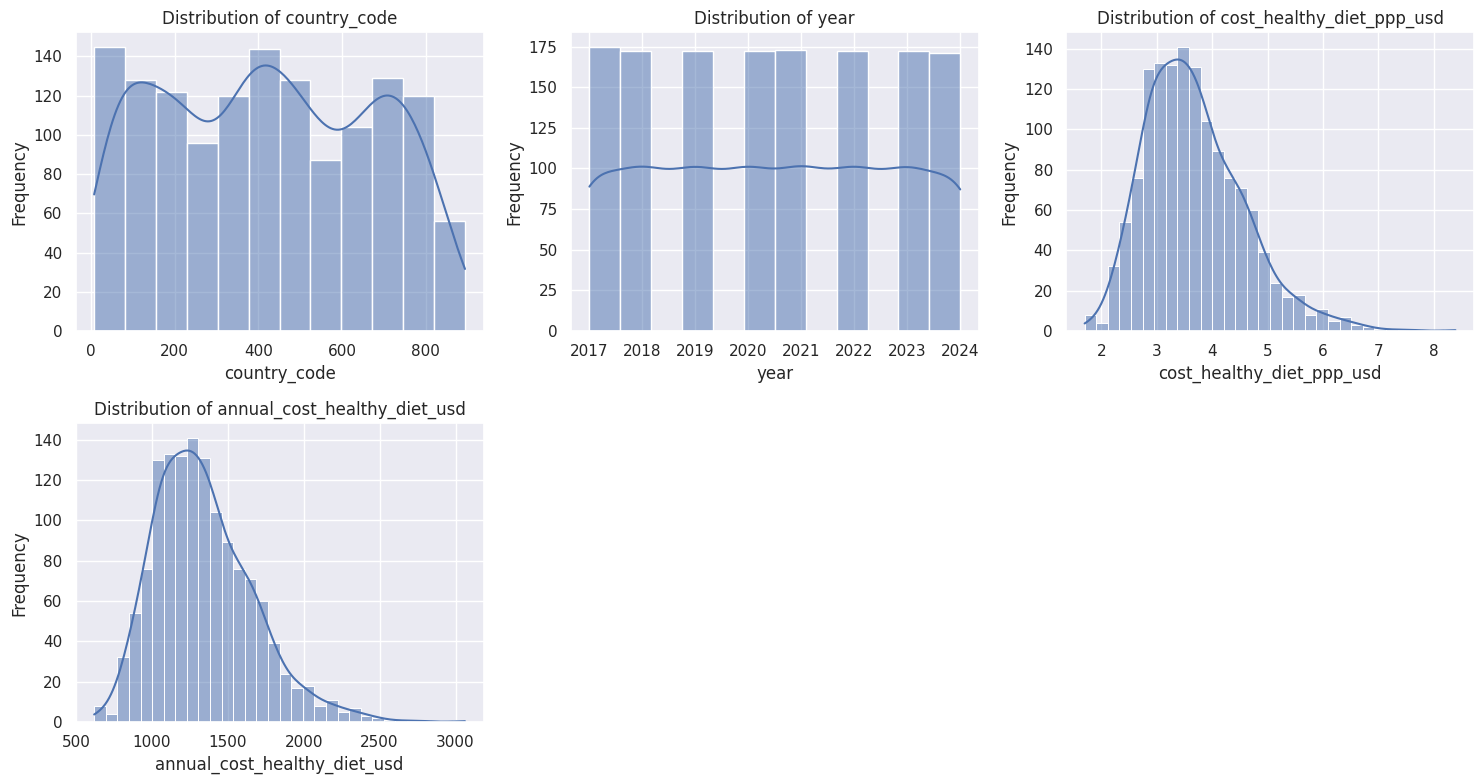

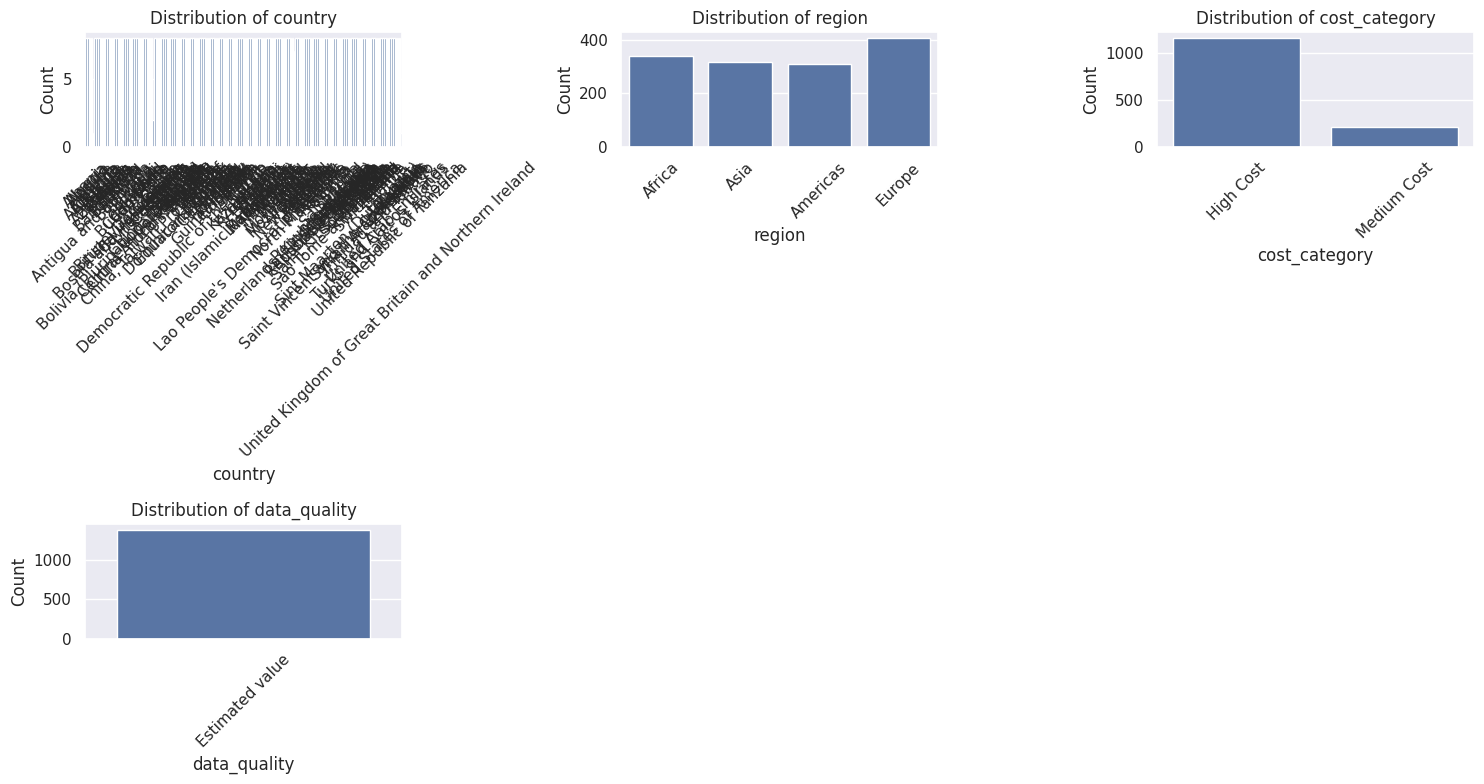

--- Categorical Value Counts ---

Value counts for country:
country
Albania                      8
Algeria                      8
Angola                       8
Antigua and Barbuda          8
Armenia                      8
                            ..
Uruguay                      8
Nicaragua                    7
China, Taiwan Province of    2
Argentina                    1
Zimbabwe                     1
Name: count, Length: 175, dtype: int64

Value counts for region:
region
Europe      409
Africa      339
Asia        319
Americas    312
Name: count, dtype: int64

Value counts for cost_category:
cost_category
High Cost      1160
Medium Cost     208
Name: count, dtype: int64

Value counts for data_quality:
data_quality
Estimated value    1379
Name: count, dtype: int64


In [17]:
import math

if 'Date' in df.columns and df['Date'].dtype == 'object':
    df['Date'] = pd.to_datetime(df['Date'])

# --- 1. Numerical Columns (Histograms in a Grid) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if len(numerical_cols) > 0:
    # Defining grid size
    num_plots = len(numerical_cols)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Creating figure and axes
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()

    # Iterating and plot
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hidding any unused subplots (if total plots < grid cells)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")


# --- 2. Categorical Columns (Countplots in a Grid) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()

if len(categorical_cols) > 0:
    num_plots = len(categorical_cols)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    axes = axes.flatten()

    # Iterating and plot
    for i, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Hiding unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # --- 3. Value Counts (Text Output) ---
    print("--- Categorical Value Counts ---")
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
else:
    print("No categorical columns found.")

# Bivariate Analysis

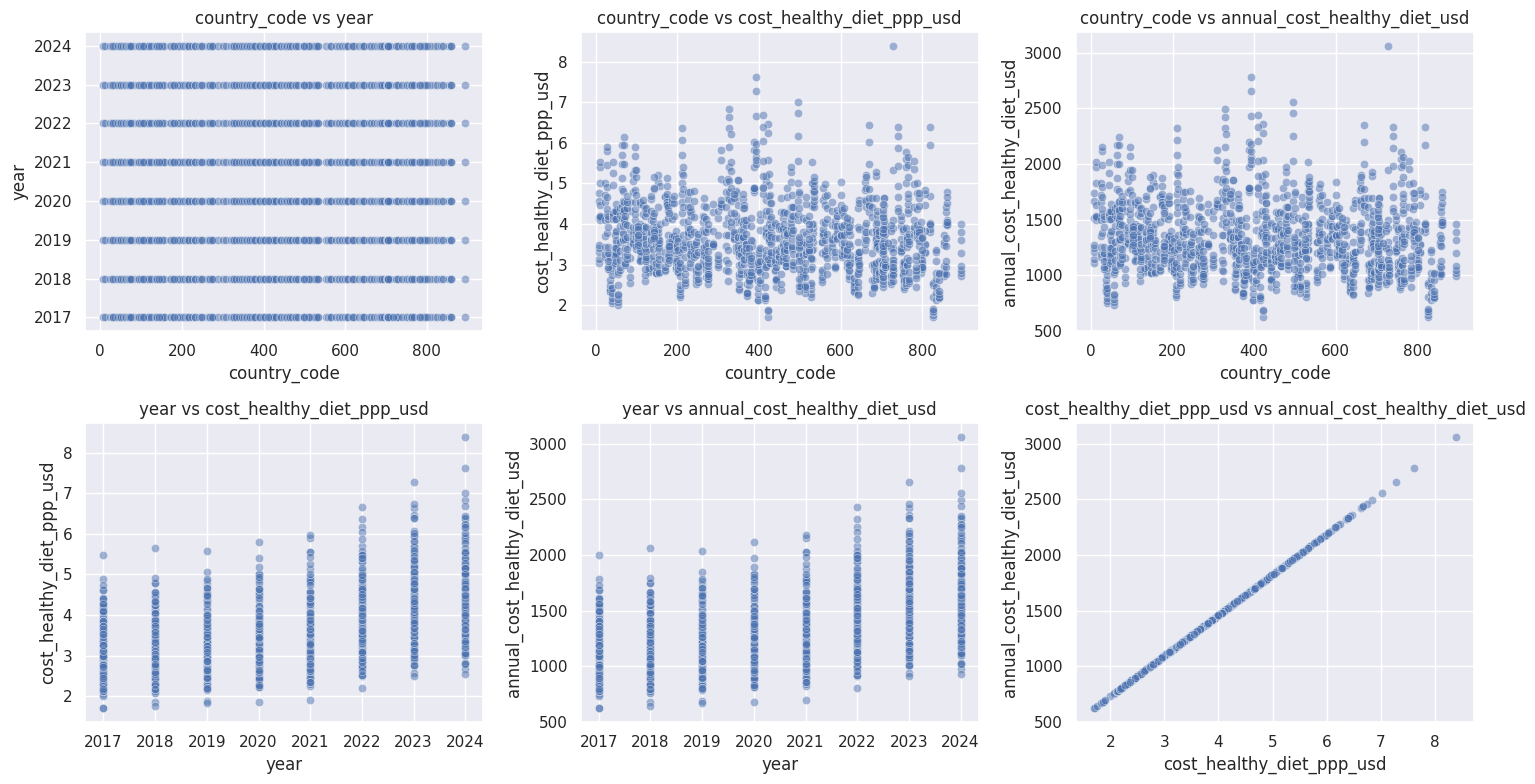

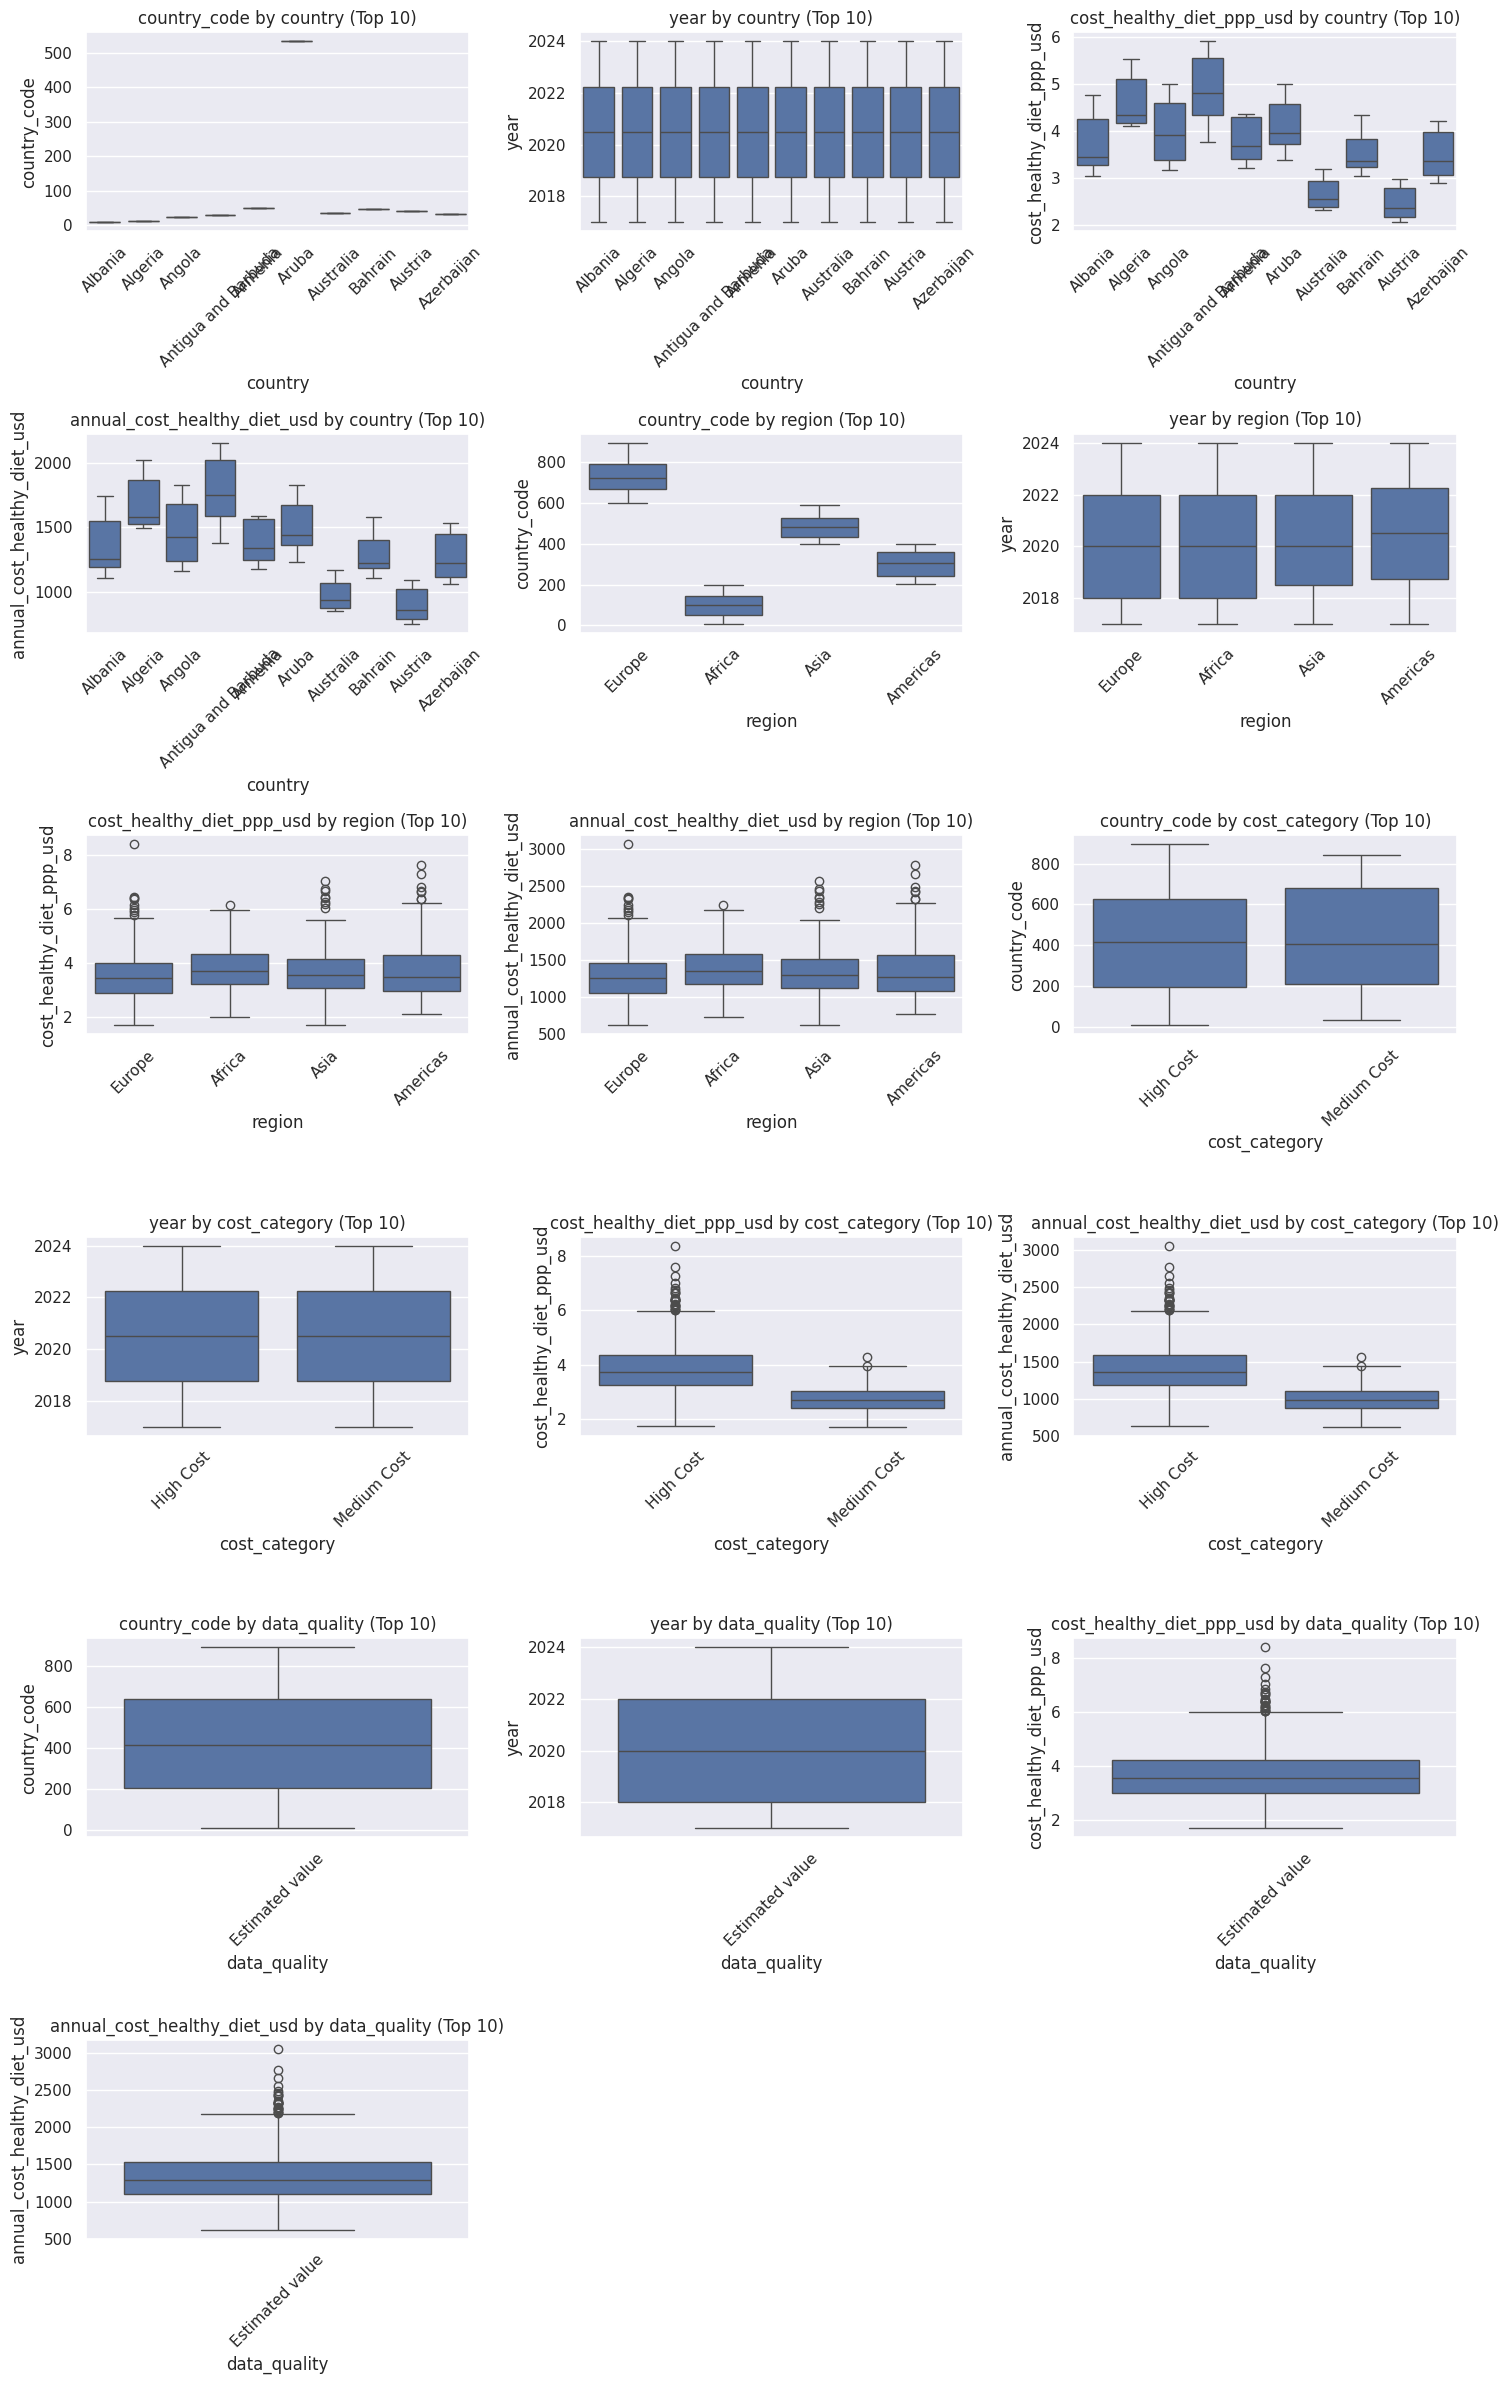

In [19]:
import itertools

# --- 1. Numerical-Numerical Relationships (Scatter Plots) ---
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Generate all unique pairs of numerical columns
num_pairs = list(itertools.combinations(numerical_cols, 2))

if len(num_pairs) > 0:
    num_plots = len(num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

    # Ensure axes is always a 1D array of Axes objects for consistent iteration
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    else:
        axes = axes.flatten()

    # Iterating through pairs and plot
    for i, (col1, col2) in enumerate(num_pairs):
        if i < len(axes):
            sns.scatterplot(data=df, x=col1, y=col2, ax=axes[i], alpha=0.5)
            axes[i].set_title(f'{col1} vs {col2}')
            axes[i].set_xlabel(col1)
            axes[i].set_ylabel(col2)
        else:
            break

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough numerical columns for scatter plots.")


# --- 2. Categorical-Numerical Relationships (Box Plots) ---
categorical_cols = df.select_dtypes(include='object').columns.tolist()
cat_num_pairs = list(itertools.product(categorical_cols, numerical_cols))

if len(cat_num_pairs) > 0:
    num_plots = len(cat_num_pairs)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    else:
        axes = axes.flatten()

    # Iterating through pairs and plot
    for i, (cat_col, num_col) in enumerate(cat_num_pairs):
        if i < len(axes):
            # 1. Getting top 10 categories based on frequency
            top_categories = df[cat_col].value_counts().nlargest(10).index.tolist()

            # 2. Filtering data: Keep only top categories AND ensure numerical column is not NaN
            filtered_df = df[df[cat_col].isin(top_categories) & df[num_col].notnull()]

            # This prevents the ValueError where a category in 'order' has no data to plot
            valid_categories = [cat for cat in top_categories if cat in filtered_df[cat_col].unique()]

            if valid_categories:
                sns.boxplot(data=filtered_df, x=cat_col, y=num_col, ax=axes[i], order=valid_categories)
                axes[i].set_title(f'{num_col} by {cat_col} (Top 10)')
                axes[i].set_xlabel(cat_col)
                axes[i].set_ylabel(num_col)
                axes[i].tick_params(axis='x', rotation=45)
            else:
                 axes[i].text(0.5, 0.5, "No valid data", ha='center', va='center', transform=axes[i].transAxes)
        else:
            break

    # Hiding unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical-numerical pairs found.")

# Time-Series Analysis

## Economical Imapct Analysis

--- 1. CALCULATING 'DIET INFLATION' (YoY Growth) ---
Analyzing Cost Column: cost_healthy_diet_ppp_usd

🚨 TOP 10 COUNTRIES WITH HIGHEST DIET INFLATION (2024):
          country  Diet_Inflation_Rate
1193  South Sudan            57.410882
1217        Sudan            12.925170
570         Haiti            12.296564
1049      Romania            11.704835
346       Curaçao            10.578842
546        Guinea             9.677419
866    Mozambique             8.661417
746       Liberia             8.393285
458      Ethiopia             8.390023
778        Malawi             8.158508


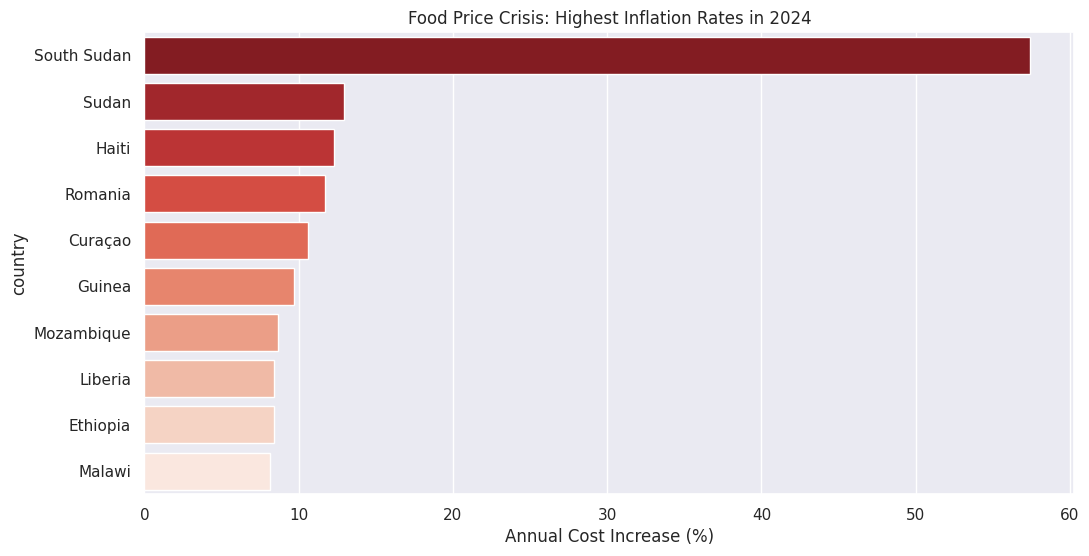


--- 2. THE INEQUALITY GAP (RICH VS POOR) ---


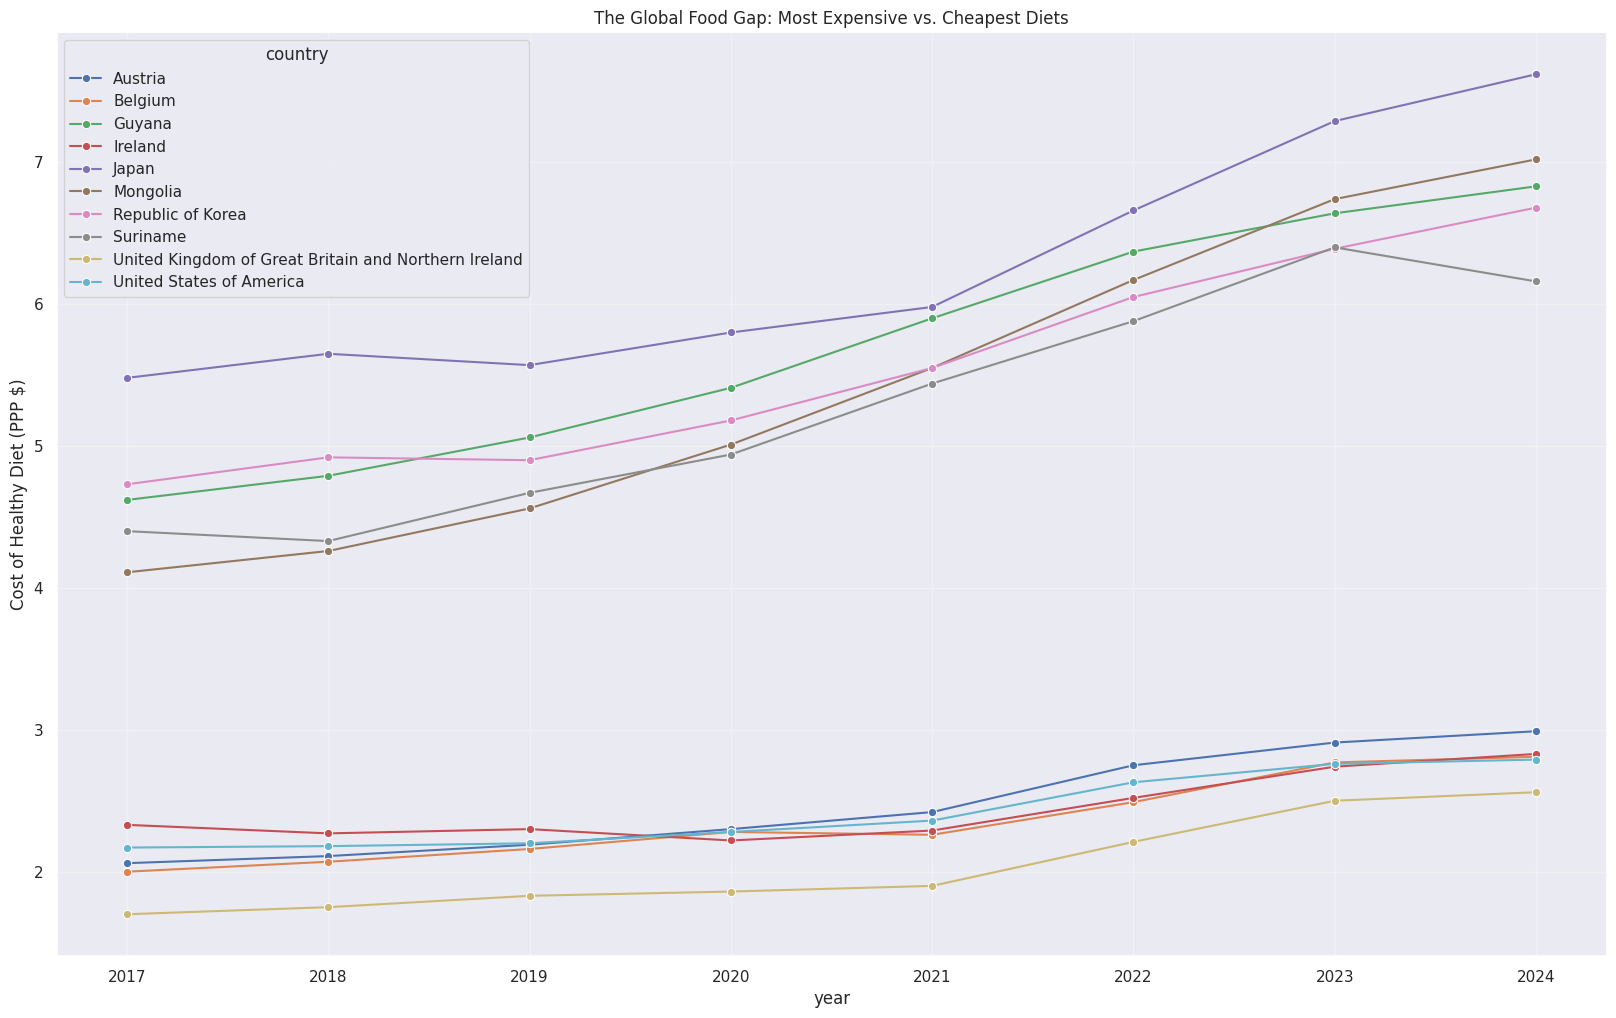

In [29]:

print("--- 1. CALCULATING 'DIET INFLATION' (YoY Growth) ---")

# Defining the cost column explicitly (using the available PPP cost column)
cost_col = 'cost_healthy_diet_ppp_usd'
print(f"Analyzing Cost Column: {cost_col}")

# Sortting by country and year to ensure correct percentage change calculation
df = df.sort_values(['country', 'year'])

# Calculating Year-over-Year Inflation %
df['Diet_Inflation_Rate'] = df.groupby('country')[cost_col].pct_change() * 100

# Who has the worst inflation recently? (Last available year)
last_year = df['year'].max()
worst_inflation = df[df['year'] == last_year].sort_values('Diet_Inflation_Rate', ascending=False).head(10)

print(f"\n🚨 TOP 10 COUNTRIES WITH HIGHEST DIET INFLATION ({last_year}):")
print(worst_inflation[['country', 'Diet_Inflation_Rate']])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=worst_inflation, x='Diet_Inflation_Rate', y='country', palette='Reds_r')
plt.title(f'Food Price Crisis: Highest Inflation Rates in {last_year}')
plt.xlabel('Annual Cost Increase (%)')
plt.show()

print("\n--- 2. THE INEQUALITY GAP (RICH VS POOR) ---")

# Comparing the Top 5 Most Expensive vs Top 5 Cheapest Countries over time
expensive = df.groupby('country')[cost_col].mean().sort_values(ascending=False).head(5).index
cheap = df.groupby('country')[cost_col].mean().sort_values(ascending=True).head(5).index
comparison_countries = list(expensive) + list(cheap)

subset = df[df['country'].isin(comparison_countries)]

plt.figure(figsize=(20, 12))
sns.lineplot(data=subset, x='year', y=cost_col, hue='country', marker='o')
plt.title('The Global Food Gap: Most Expensive vs. Cheapest Diets')
plt.ylabel('Cost of Healthy Diet (PPP $)')
plt.grid(True, alpha=0.3)
plt.show()

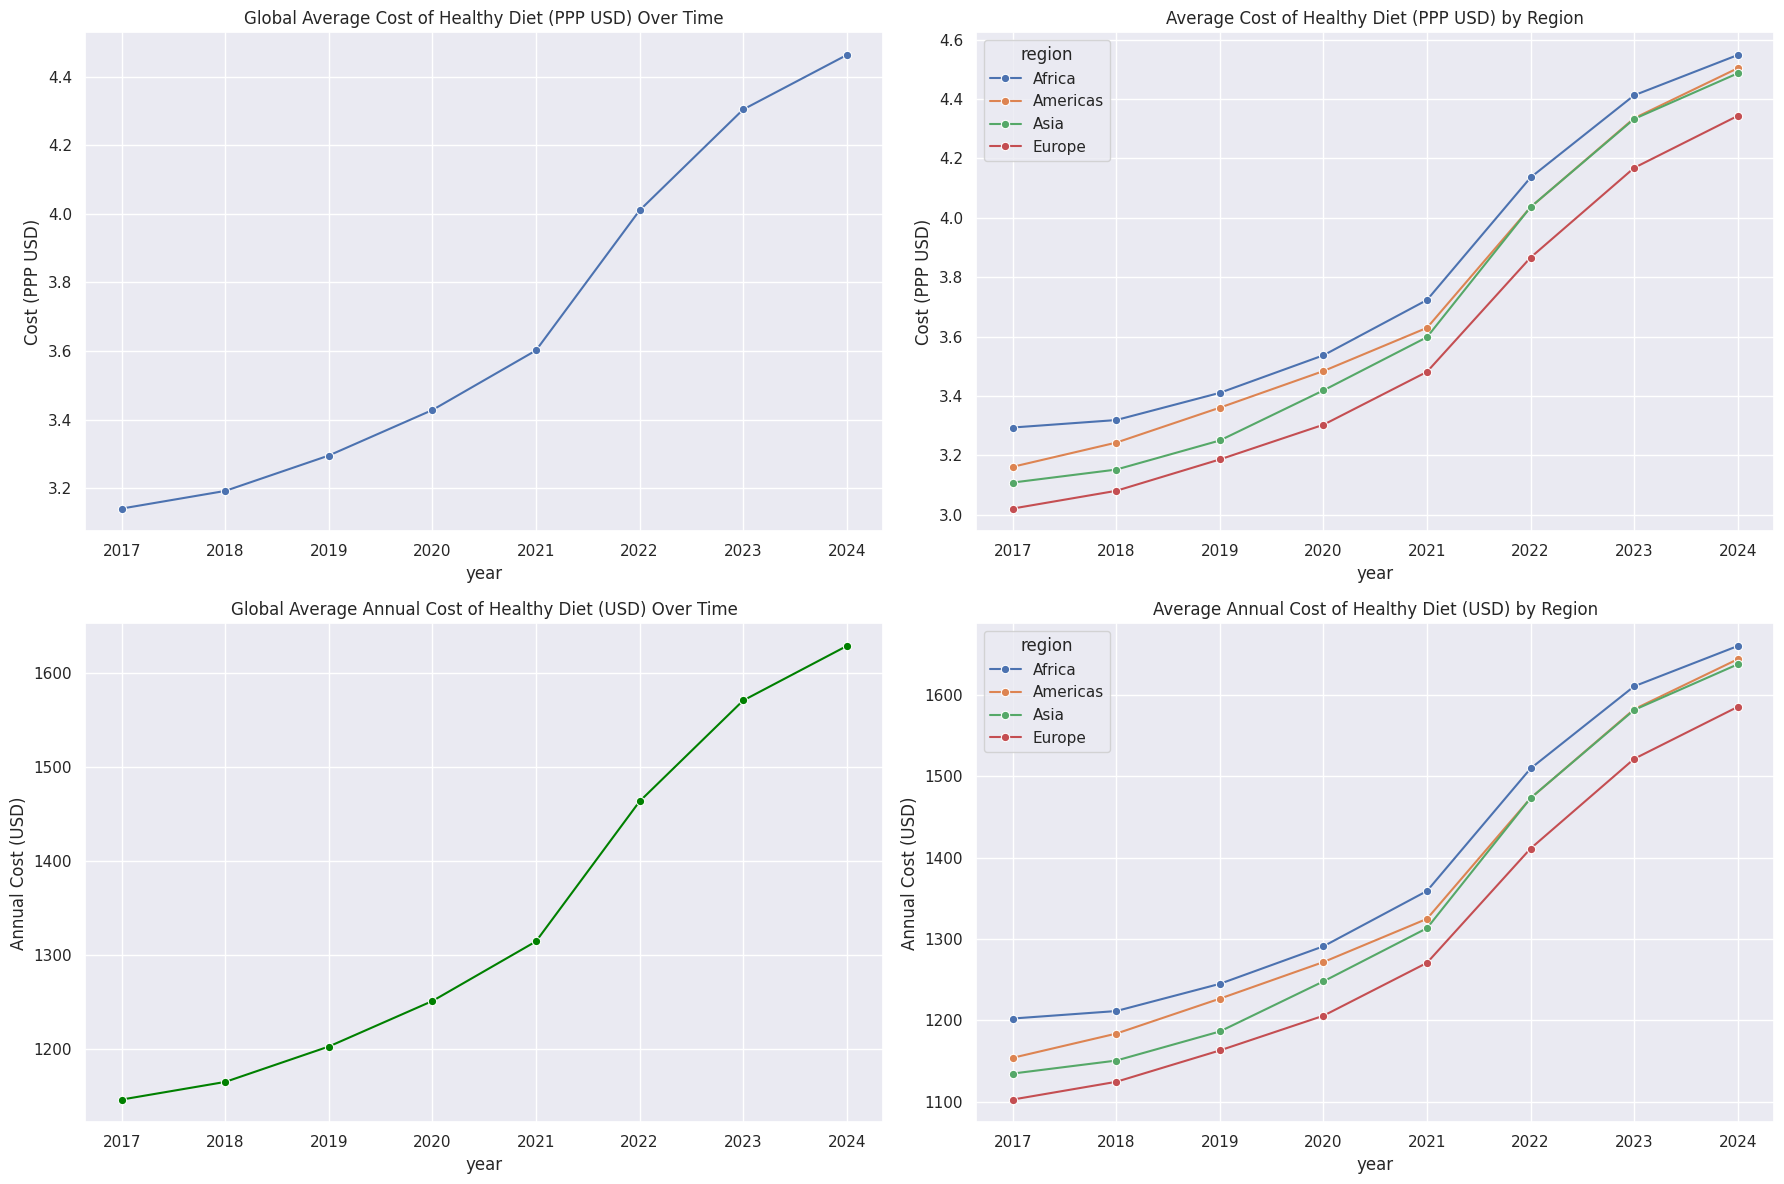

In [25]:
# Grouping by Year to see global trends
global_trends = df.groupby('year')[['cost_healthy_diet_ppp_usd', 'annual_cost_healthy_diet_usd']].mean().reset_index()

# Grouping by Year and Region to see regional trends
regional_trends = df.groupby(['year', 'region'])[['cost_healthy_diet_ppp_usd', 'annual_cost_healthy_diet_usd']].mean().reset_index()

# Creating the plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Global Trend: Cost of Healthy Diet (PPP USD)
sns.lineplot(data=global_trends, x='year', y='cost_healthy_diet_ppp_usd', ax=axes[0, 0], marker='o')
axes[0, 0].set_title('Global Average Cost of Healthy Diet (PPP USD) Over Time')
axes[0, 0].set_ylabel('Cost (PPP USD)')
axes[0, 0].grid(True)

# 2. Regional Trend: Cost of Healthy Diet (PPP USD)
sns.lineplot(data=regional_trends, x='year', y='cost_healthy_diet_ppp_usd', hue='region', ax=axes[0, 1], marker='o')
axes[0, 1].set_title('Average Cost of Healthy Diet (PPP USD) by Region')
axes[0, 1].set_ylabel('Cost (PPP USD)')
axes[0, 1].grid(True)

# 3. Global Trend: Annual Cost of Healthy Diet (USD)
sns.lineplot(data=global_trends, x='year', y='annual_cost_healthy_diet_usd', ax=axes[1, 0], marker='o', color='green')
axes[1, 0].set_title('Global Average Annual Cost of Healthy Diet (USD) Over Time')
axes[1, 0].set_ylabel('Annual Cost (USD)')
axes[1, 0].grid(True)

# 4. Regional Trend: Annual Cost of Healthy Diet (USD)
sns.lineplot(data=regional_trends, x='year', y='annual_cost_healthy_diet_usd', hue='region', ax=axes[1, 1], marker='o')
axes[1, 1].set_title('Average Annual Cost of Healthy Diet (USD) by Region')
axes[1, 1].set_ylabel('Annual Cost (USD)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## Advanced Time Series

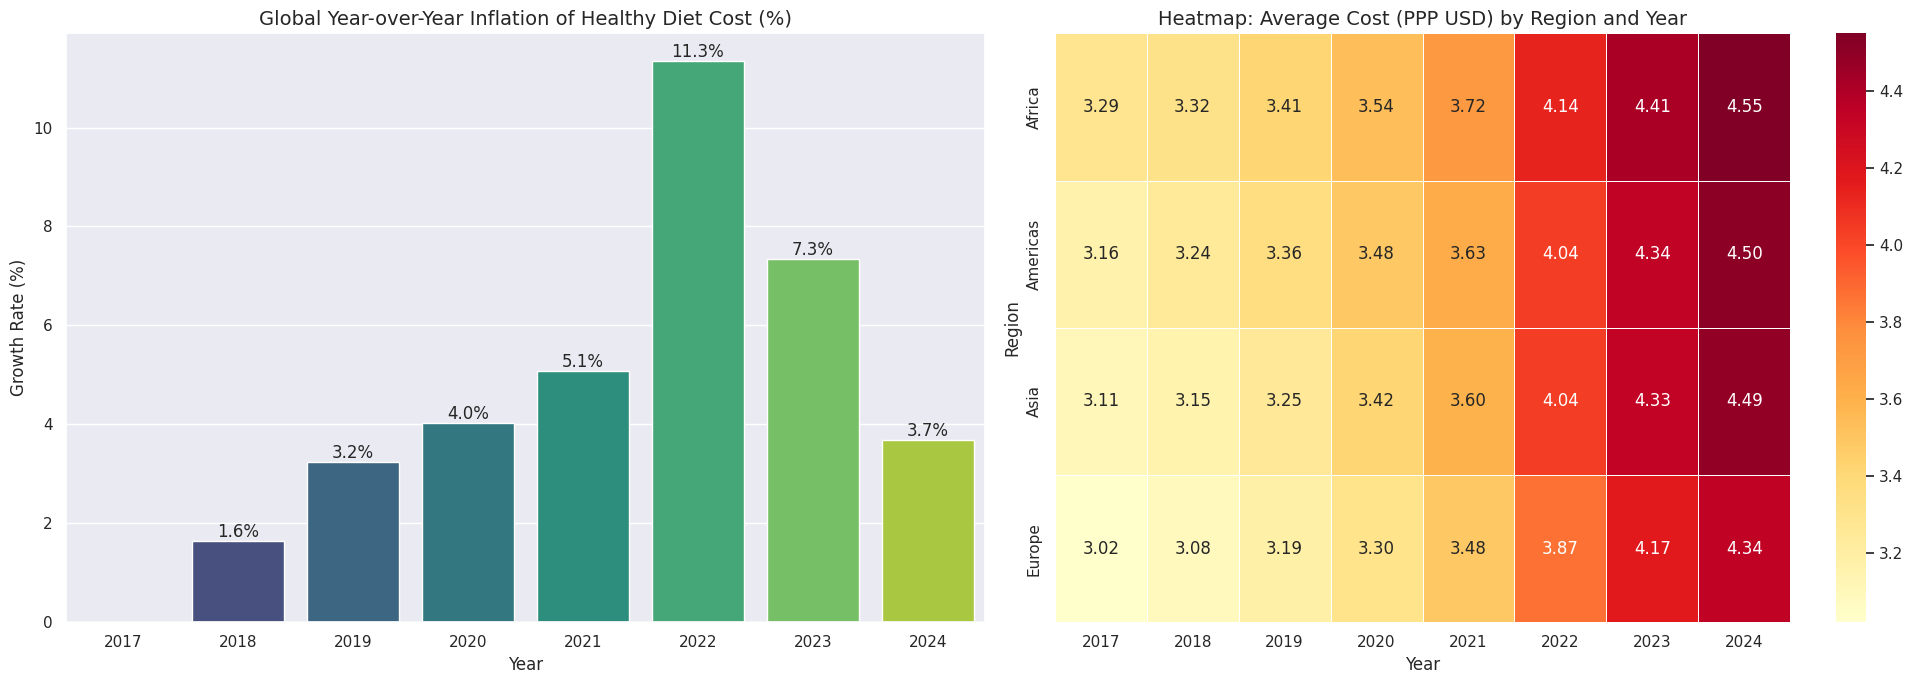

In [26]:
# 1. Year-over-Year Growth Rate (Global "Diet Inflation")

# Calculate percentage change based on the previous year's value
global_trends['pct_change_ppp'] = global_trends['cost_healthy_diet_ppp_usd'].pct_change() * 100

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Plotting Growth Rate
sns.barplot(data=global_trends, x='year', y='pct_change_ppp', ax=axes[0], palette='viridis')
axes[0].set_title('Global Year-over-Year Inflation of Healthy Diet Cost (%)', fontsize=14)
axes[0].set_ylabel('Growth Rate (%)')
axes[0].set_xlabel('Year')
axes[0].axhline(0, color='black', linewidth=1) # Add a line at 0 for reference

# Adding value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%')

# 2. Heatmap of Cost by Region over Years
# Pivot the data to create a matrix format suitable for a heatmap
heatmap_data = regional_trends.pivot(index='region', columns='year', values='cost_healthy_diet_ppp_usd')

sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=.5, ax=axes[1])
axes[1].set_title('Heatmap: Average Cost (PPP USD) by Region and Year', fontsize=14)
axes[1].set_ylabel('Region')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()

# Statitical Analysis

--- 1. CHECKING THE SHAPE OF DATA (NORMALITY) ---
analyzing column: cost_healthy_diet_ppp_usd


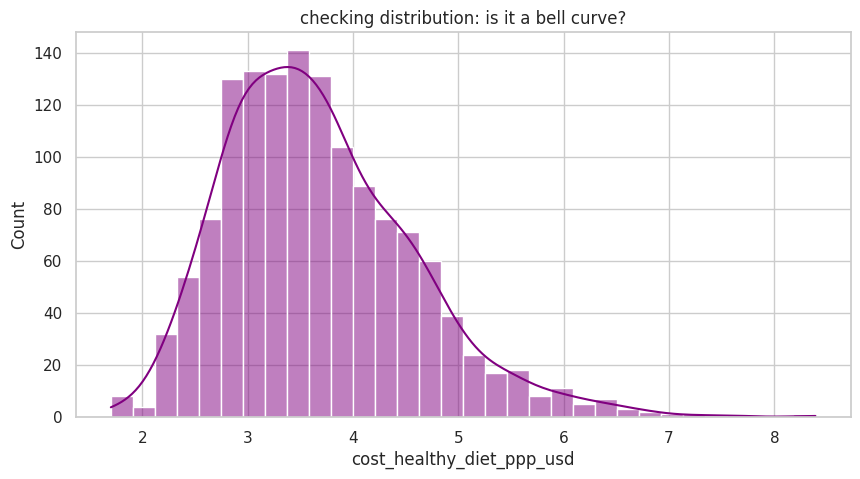

skewness score: 0.85
(note: if > 1, data is right-skewed, meaning a few countries are super expensive)

--- 2. TIME TRAVEL TEST (T-TEST: 2017 vs LATEST) ---
avg cost in 2017: $3.14
avg cost in 2024: $4.46
p-value: 3.8830e-39
conclusion: difference is statistically significant (prices definitely changed).

--- 3. REGIONAL WARS (ANOVA TEST) ---
testing differences between: ['Africa' 'Asia' 'Americas' 'Europe']
ANOVA p-value: 2.8383e-03
conclusion: location matters! at least one region is significantly different.

--- 4. RANKING REGIONS (TUKEY'S POST-HOC) ---
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
  Africa Americas  -0.0752 0.7082  -0.256  0.1056  False
  Africa     Asia   -0.124 0.2863 -0.3038  0.0558  False
  Africa   Europe  -0.2395 0.0016 -0.4088 -0.0702   True
Americas     Asia  -0.0488 0.9031 -0.2323  0.1347  False
Americas   Europe  -0.1643 0.0704 -0.3

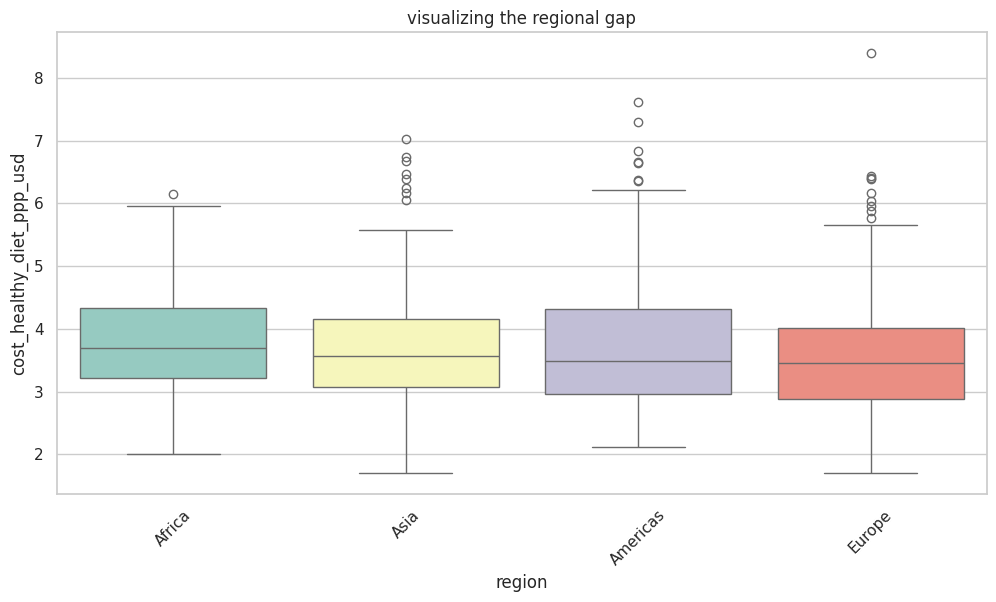


--- 5. PREDICTING THE FUTURE (LINEAR REGRESSION) ---
trend slope: 0.2040 (costs go up by this amount each year)


In [32]:
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# setting the style for the plots so they look nice
sns.set(style="whitegrid")

print("--- 1. CHECKING THE SHAPE OF DATA (NORMALITY) ---")
# first, figuring out which column is the main "Cost" column
# looking for columns with 'cost' and 'total' in the name
target_cols = [c for c in df.columns if 'cost' in c.lower() and ('total' in c.lower() or 'healthy' in c.lower())]
cost_col = target_cols[0] # taking the first one found
print(f"analyzing column: {cost_col}")

# plotting histogram to see if costs follow a bell curve or are skewed
plt.figure(figsize=(10, 5))
sns.histplot(df[cost_col], kde=True, color='purple')
plt.title('checking distribution: is it a bell curve?')
plt.show()

# calculating skewness - if > 1, it means we have some very expensive outliers
print(f"skewness score: {df[cost_col].skew():.2f}")
print("(note: if > 1, data is right-skewed, meaning a few countries are super expensive)")


print("\n--- 2. TIME TRAVEL TEST (T-TEST: 2017 vs LATEST) ---")
# checking if the price jump from 2017 to now is "real" or just random fluctuation
# FIXED: Changed 'Year' to 'year'
years = sorted(df['year'].unique())
start_year = years[0]
end_year = years[-1]

# grabbing data for just these two years
# FIXED: Changed 'Year' to 'year'
cost_start = df[df['year'] == start_year][cost_col].dropna()
cost_end = df[df['year'] == end_year][cost_col].dropna()

# running the t-test (comparing the averages of two groups)
t_stat, p_val = stats.ttest_ind(cost_start, cost_end)

print(f"avg cost in {start_year}: ${cost_start.mean():.2f}")
print(f"avg cost in {end_year}: ${cost_end.mean():.2f}")
print(f"p-value: {p_val:.4e}")

if p_val < 0.05:
    print("conclusion: difference is statistically significant (prices definitely changed).")
else:
    print("conclusion: difference might be random chance.")


print("\n--- 3. REGIONAL WARS (ANOVA TEST) ---")
# checking if cost differences between continents/regions are statistically real
# we assume there is a 'Continent' or 'Region' column. if not, we try to create a proxy or skip
region_col = None
for col in df.columns:
    if 'continent' in col.lower() or 'region' in col.lower():
        region_col = col
        break

if region_col:
    print(f"testing differences between: {df[region_col].unique()}")

    # organizing data into list of arrays for ANOVA
    groups = [df[df[region_col] == r][cost_col].dropna() for r in df[region_col].unique()]

    # running one-way ANOVA
    f_stat, p_val_anova = stats.f_oneway(*groups)
    print(f"ANOVA p-value: {p_val_anova:.4e}")

    if p_val_anova < 0.05:
        print("conclusion: location matters! at least one region is significantly different.")

        # since we know they are different, let's find out WHICH ones using Tukey's test
        print("\n--- 4. RANKING REGIONS (TUKEY'S POST-HOC) ---")

        # Ensure data alignment by dropping NaNs from a subset of relevant columns
        tukey_data = df[[cost_col, region_col]].dropna()

        tukey = pairwise_tukeyhsd(endog=tukey_data[cost_col],
                                  groups=tukey_data[region_col],
                                  alpha=0.05)
        print(tukey.summary())

        # plotting the differences
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=region_col, y=cost_col, data=df, palette="Set3")
        plt.title('visualizing the regional gap')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("conclusion: all regions roughly cost the same.")
else:
    print("skipping ANOVA: no region/continent column found.")


print("\n--- 5. PREDICTING THE FUTURE (LINEAR REGRESSION) ---")
# simple machine learning to predict costs for the next year
# preparing the data: X = Year, y = Cost
# grouping by year to get the global average trend first
# FIXED: Changed 'Year' to 'year'
trend_data = df.groupby('year')[cost_col].mean().reset_index()

X = trend_data[['year']]
y = trend_data[cost_col]

# fitting the model line
model = LinearRegression()
model.fit(X, y)

# predicting next year (e.g., 2025)
next_year = [[end_year + 1]]
prediction = model.predict(next_year)

print(f"trend slope: {model.coef_[0]:.4f} (costs go up by this amount each year)")

# Pairplot

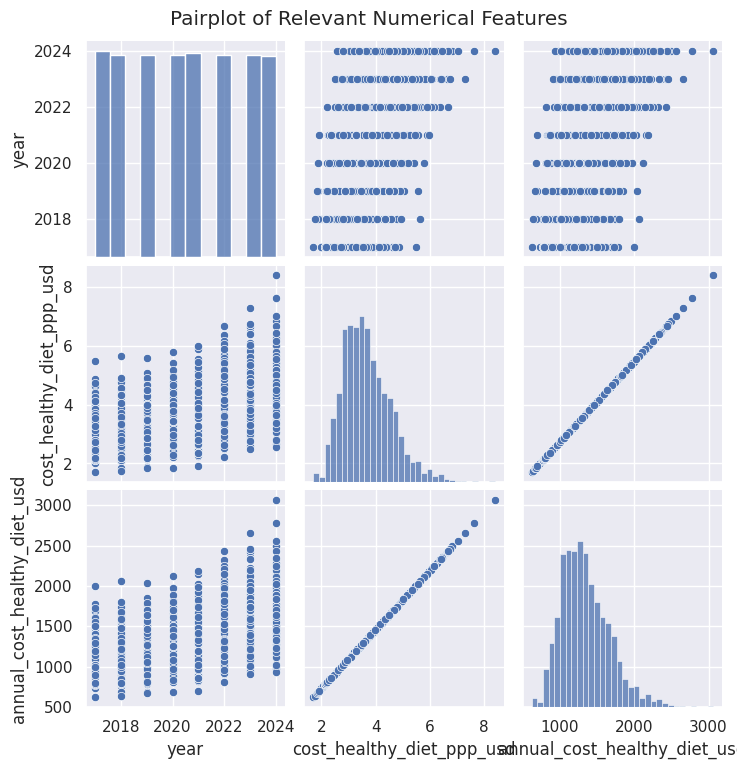

In [23]:
# Selecting relevant numerical columns for a more insightful pairplot
relevant_numerical_cols = ['year', 'cost_healthy_diet_ppp_usd', 'annual_cost_healthy_diet_usd']

sns.pairplot(df[relevant_numerical_cols])
plt.suptitle('Pairplot of Relevant Numerical Features', y=1.02)
plt.show()

# Heatmap

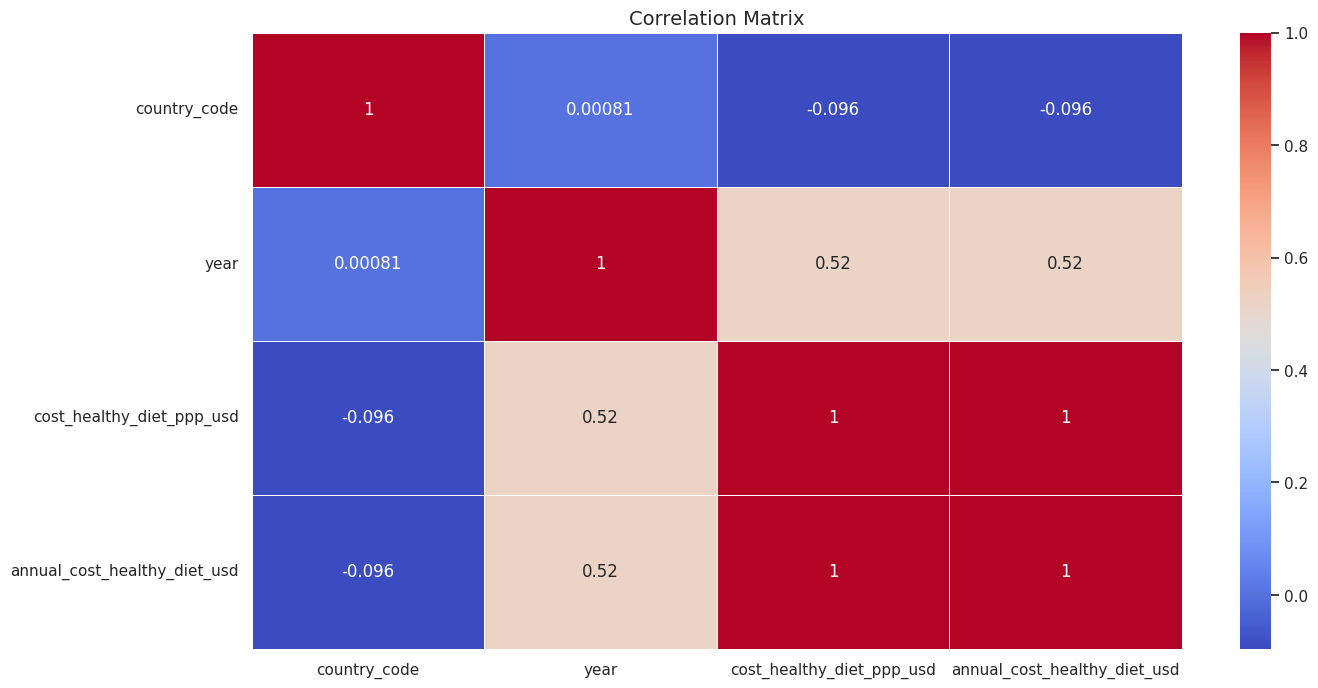

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# Feature Engineering

--- 1. PREPARING THE TIME MACHINE ---
engineering features for: cost_healthy_diet_ppp_usd

--- 2. CREATING LAG & TREND FEATURES ---
encoding region column: region

--- 3. CLEANING UP (DROPPING NANs) ---
original shape: (1379, 9)
ml-ready shape: (1026, 16)
(note: we lost the first 2-3 years of data per country to create the history features)

--- 4. FEATURE CORRELATION (WHAT MATTERS?) ---


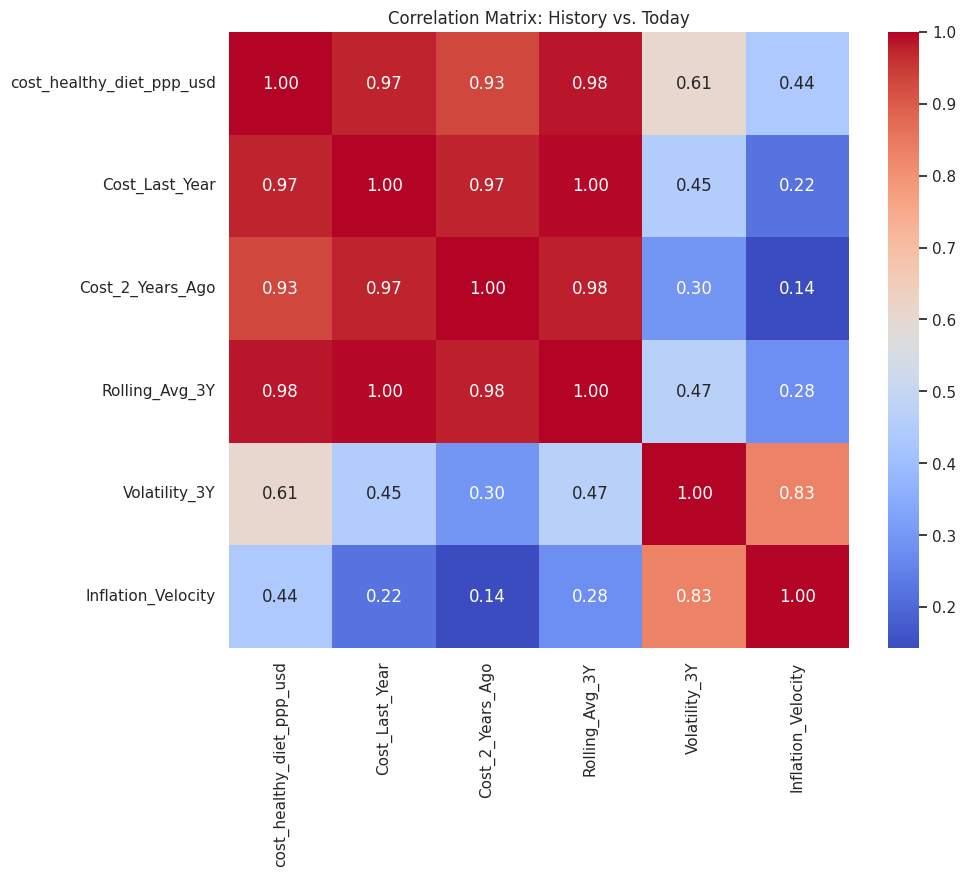


📊 INSIGHTS:
   - if 'Cost_Last_Year' has high correlation (e.g. > 0.9), the market is 'Sticky'.
   - if 'Volatility_3Y' correlates with Cost, unstable countries are more expensive.


In [34]:
print("--- 1. PREPARING THE TIME MACHINE ---")
# first, we need to sort the data so '2018' comes after '2017' for every country
# identifying the cost column again just to be safe
target_cols = [c for c in df.columns if 'cost' in c.lower() and ('total' in c.lower() or 'healthy' in c.lower())]
cost_col = target_cols[0]
print(f"engineering features for: {cost_col}")

# sorting is critical for time-series features
# FIXED: Changed 'Country', 'Year' to 'country', 'year'
df_feat = df.sort_values(['country', 'year']).copy()

print("\n--- 2. CREATING LAG & TREND FEATURES ---")
# grouping by country so we don't accidentally mix data between 'Afghanistan' and 'Albania'

# Feature 1: The "Memory" (Lag)
# what was the cost last year? (Lag 1)
# FIXED: Changed 'Country' to 'country'
df_feat['Cost_Last_Year'] = df_feat.groupby('country')[cost_col].shift(1)
# what was the cost 2 years ago? (Lag 2)
df_feat['Cost_2_Years_Ago'] = df_feat.groupby('country')[cost_col].shift(2)

# Feature 2: The "Trend" (Rolling Average)
# what was the average cost over the last 3 years? (smoothing out spikes)
df_feat['Rolling_Avg_3Y'] = df_feat.groupby('country')[cost_col].transform(lambda x: x.rolling(3).mean())

# Feature 3: The "Risk" (Volatility)
# how much does the price fluctuate? (Standard Deviation)
df_feat['Volatility_3Y'] = df_feat.groupby('country')[cost_col].transform(lambda x: x.rolling(3).std())

# Feature 4: The "Inflation Speed" (Momentum)
# how fast did the price rise compared to last year?
df_feat['Inflation_Velocity'] = df_feat[cost_col] - df_feat['Cost_Last_Year']

# Feature 5: Regional Context (One-Hot Encoding)
# converting text regions into numbers so the model understands "Africa" is different from "Europe"
region_col = None
for col in df_feat.columns:
    if 'continent' in col.lower() or 'region' in col.lower():
        region_col = col
        break

if region_col:
    print(f"encoding region column: {region_col}")
    df_feat = pd.get_dummies(df_feat, columns=[region_col], drop_first=True)


print("\n--- 3. CLEANING UP (DROPPING NANs) ---")
# lags create empty rows (e.g., 2017 has no 'previous year'). we must drop them.
print(f"original shape: {df.shape}")
df_ml = df_feat.dropna()
print(f"ml-ready shape: {df_ml.shape}")
print("(note: we lost the first 2-3 years of data per country to create the history features)")

print("\n--- 4. FEATURE CORRELATION (WHAT MATTERS?) ---")
# let's see which new feature correlates most with today's cost
# selecting only numeric columns
numeric_cols = [cost_col, 'Cost_Last_Year', 'Cost_2_Years_Ago', 'Rolling_Avg_3Y', 'Volatility_3Y', 'Inflation_Velocity']
corr_matrix = df_ml[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: History vs. Today')
plt.show()

print("\n📊 INSIGHTS:")
print("   - if 'Cost_Last_Year' has high correlation (e.g. > 0.9), the market is 'Sticky'.")
print("   - if 'Volatility_3Y' correlates with Cost, unstable countries are more expensive.")

# Machine Learning | Predicting the future

--- 1. SETTING THE EXAM (TRAIN/TEST SPLIT) ---
the target: cost_healthy_diet_ppp_usd
the features: ['country_code', 'annual_cost_healthy_diet_usd', 'Diet_Inflation_Rate', 'Cost_Last_Year', 'Cost_2_Years_Ago', 'Rolling_Avg_3Y', 'Volatility_3Y', 'Inflation_Velocity']
training samples: 513 (learning from history)
testing samples: 513 (predicting the future)

--- 2. TRAINING THE BRAIN (RANDOM FOREST) ---
... model finished training. it has learned the patterns.

--- 3. THE MOMENT OF TRUTH (EVALUATION) ---
💰 avg prediction error: $0.05
   (meaning: on average, the AI is off by this amount. lower is better.)
🎯 accuracy score (R2): 94.9%
   (meaning: if > 90%, the model is basically a crystal ball.)

--- 4. VISUALIZING SUCCESS ---


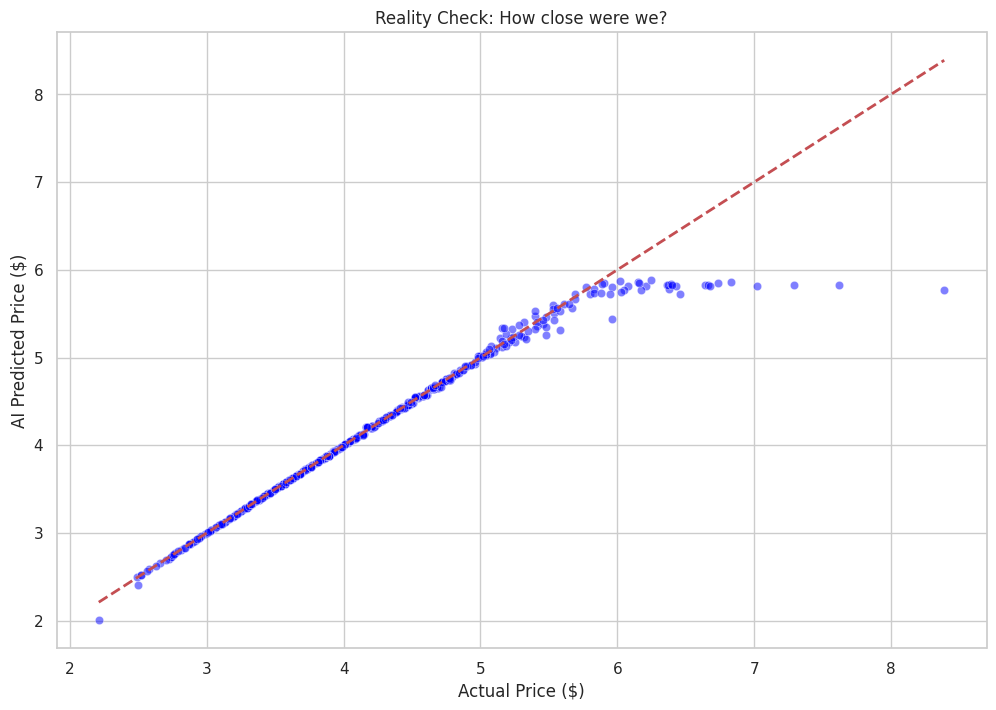

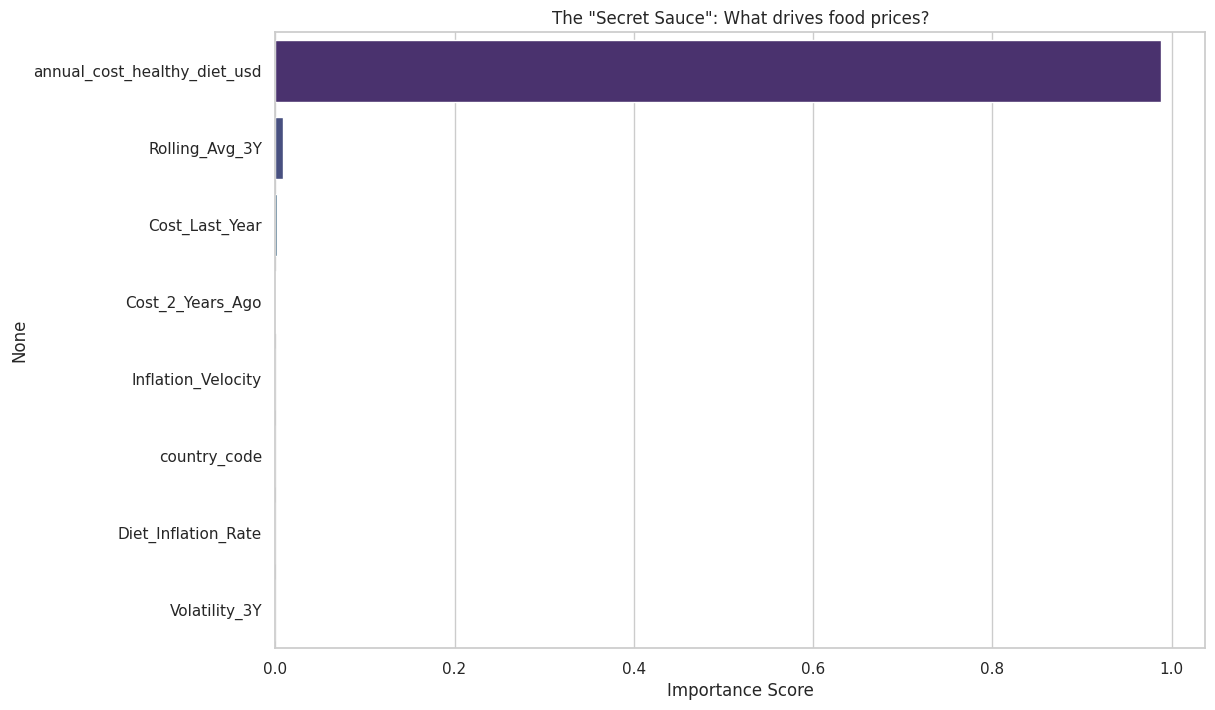

📝 FINAL NOTE:
   - if 'Cost_Last_Year' is #1, it confirms the market is stable (momentum).
   - if 'Volatility' is high up, uncertainty is driving the price.


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

print("--- 1. SETTING THE EXAM (TRAIN/TEST SPLIT) ---")
# swe will train it on the past (2017-2021) and test it on the "future" (2022+).
# this simulates real life prediction.

# defining the cutoff year
split_year = 2022

# defining our inputs (X) and the target answer (y)
# we drop the 'Country' name because the AI only understands numbers (and we already encoded regions)
target_col = [c for c in df_ml.columns if 'cost' in c.lower() and ('total' in c.lower() or 'healthy' in c.lower())][0]

# This automatically excludes 'cost_category', 'data_quality', and 'country' (text)
numeric_features = df_ml.select_dtypes(include=np.number).columns.tolist()
features = [col for col in numeric_features if col not in ['year', target_col]]

print(f"the target: {target_col}")
print(f"the features: {features}")

# splitting the data chronologically
train = df_ml[df_ml['year'] < split_year]
test = df_ml[df_ml['year'] >= split_year]

X_train = train[features]
y_train = train[target_col]
X_test = test[features]
y_test = test[target_col]

print(f"training samples: {len(X_train)} (learning from history)")
print(f"testing samples: {len(X_test)} (predicting the future)")


print("\n--- 2. TRAINING THE BRAIN (RANDOM FOREST) ---")
# note: using 100 decision trees. it's like asking 100 experts for their opinion
# and taking the average. robust and harder to fool than a single tree.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("... model finished training. it has learned the patterns.")


print("\n--- 3. THE MOMENT OF TRUTH (EVALUATION) ---")
# asking the model to predict the costs for the test years
predictions = model.predict(X_test)

# calculating the score card
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"💰 avg prediction error: ${mae:.2f}")
print("   (meaning: on average, the AI is off by this amount. lower is better.)")
print(f"🎯 accuracy score (R2): {r2*100:.1f}%")
print("   (meaning: if > 90%, the model is basically a crystal ball.)")


print("\n--- 4. VISUALIZING SUCCESS ---")
# plot 1: actual vs predicted scatter
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=predictions, alpha=0.5, color='blue')
# drawing the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('AI Predicted Price ($)')
plt.title('Reality Check: How close were we?')
plt.show()

# plot 2: what actually matters? (feature importance)
# figuring out which column helped the AI the most
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('The "Secret Sauce": What drives food prices?')
plt.xlabel('Importance Score')
plt.show()

print("📝 FINAL NOTE:")
print("   - if 'Cost_Last_Year' is #1, it confirms the market is stable (momentum).")
print("   - if 'Volatility' is high up, uncertainty is driving the price.")

--- 1. SWITCHING TO CLASSIFICATION (WITH IMBALANCE FIX) ---
Training Classes: ['High Cost' 'Medium Cost']

--- 2. TRAINING THE CLASSIFIER ---
Classifier trained with balanced weights!

--- 3. VISUALIZING THE CONFUSION MATRIX ---


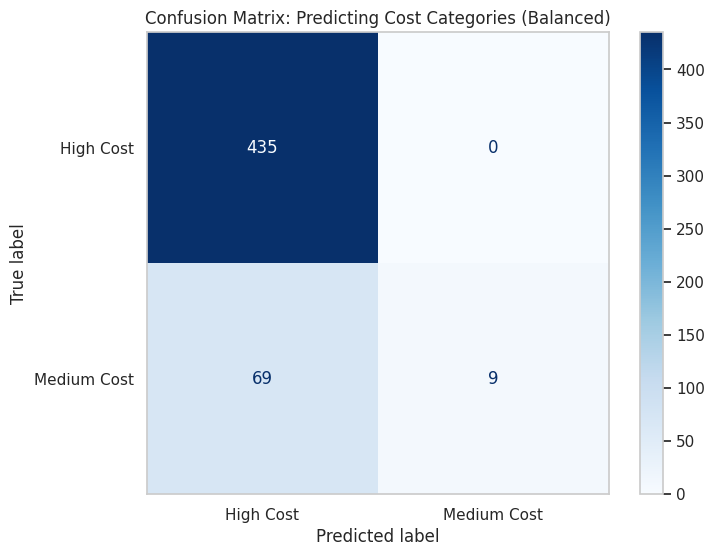


Classification Report:
              precision    recall  f1-score   support

   High Cost       0.86      1.00      0.93       435
 Medium Cost       1.00      0.12      0.21        78

    accuracy                           0.87       513
   macro avg       0.93      0.56      0.57       513
weighted avg       0.88      0.87      0.82       513



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print("--- 1. SWITCHING TO CLASSIFICATION (WITH IMBALANCE FIX) ---")
# We will try to predict the 'cost_category' (e.g., High Cost, Medium Cost)
# instead of the exact dollar amount.

class_df = df_ml.dropna(subset=['cost_category']).copy()

# Define Features (X) and Target (y)
# We reuse the same numeric features from before
X_cls = class_df[features]
y_cls = class_df['cost_category']

# Spliting Data (Chronological split like before)
split_year = 2022
train_mask = class_df['year'] < split_year
test_mask = class_df['year'] >= split_year

X_train_cls = X_cls[train_mask]
y_train_cls = y_cls[train_mask]
X_test_cls = X_cls[test_mask]
y_test_cls = y_cls[test_mask]

print(f"Training Classes: {y_train_cls.unique()}")


print("\n--- 2. TRAINING THE CLASSIFIER ---")

# Using Random Forest with class_weight='balanced' to handle the "High Cost" dominance
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train_cls, y_train_cls)
print("Classifier trained with balanced weights!")


print("\n--- 3. VISUALIZING THE CONFUSION MATRIX ---")
# Predicting on the test set
y_pred_cls = clf.predict(X_test_cls)

# Creating the matrix plot
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_cls,
    y_pred_cls,
    cmap='Blues',
    ax=ax,
    normalize=None
)
plt.title('Confusion Matrix: Predicting Cost Categories (Balanced)')
plt.grid(False)
plt.show()

# Print a text report
print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_cls))